# Data Cleaning and Analysis: Reviewing SAT score correlations in New York public schools

The purpose of this project is to thoroughly clean and provide insights from a complex dataset. To accomplish this, we will import and clean a variety of data sources provided by New York City Public Schools.

We will them explore correlations and visualizations to see if there are any notable relationships in the data.

# Summary of Findings

It appears that several factors are correlated with a school's average SAT score. In particular:

* Schools with higher percentages of white and asian students tend to correlate with higher SAT scores, while schools with higher percentages of black or hispanic students are correlated with lower SAT scores.
* When surveyed for their view of school safety, communication, engagement and academic expectations, students' and teachers' scores tend to track with average sat scores. Parents' scores, however, are far less reliable indicators.
* Schools with a higher percentage of female students tend to score higher on average SAT score.
* Schools whose students take more AP exams tend to have higher SAT scores, but this trend levels off as the AP-exam-per-student percentage grows.

# Data Cleaning
## Read in the data ##

The information for this project is obtained from the [New York City public schools website](https://data.cityofnewyork.us/browse?category=Education).

We will combine several related datasets:

* 2012 SAT scores by school - average SAT scores for each high school in New York City
* Class size - Average class size for each school
* AP test results - Advanced Placement (AP) exam results for each high school
* Graduation outcomes - The percentage of students who graduated
* Demographics - Demographic information for each school
* School survey - Surveys of parents, teachers, and students at each school

In [1]:
import pandas as pd

# Creating a dictionary of relevant dataframes
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}
for f in data_files:
    d = pd.read_csv(f)
    key_name = f.replace(".csv", "")
    data[key_name] = d

In [2]:
for key in data:
    print(data[key].head(5))

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

After reviewing these datasets, it seems as though `'DBN'` is a common field that provides a unique school identifier code. We will use this code as our school identifier to merge these datasets in a meaningful way.

## Read in the surveys ##

The survey data is contained in two separate `txt` files which need to be imported using the proper encoding and combined into a single dataframe.

In [3]:
all_survey = pd.read_csv('survey_all.txt', delimiter="\t", encoding="windows-1252")

d75_survey = pd.read_csv('survey_d75.txt', delimiter="\t", encoding="windows-1252")

survey = pd.concat([all_survey, d75_survey], axis=0, sort=False)

print(survey.head())

      dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p  ...  s_q14_2  \
0         0.0           Elementary School   NaN    88    60  ...      NaN   
1         0.0           Elementary School   NaN   100    60  ...      NaN   
2         0.0           Elementary School   NaN    88    73  ...      NaN   
3         0.0  Elementary / Middle School  89.0    73    50  ...      NaN   
4         0.0           Elementary School   NaN   100    60  ...      NaN   

   s_q14_3  s_q14_4  s_q14_5  s_q14_6  s_q14_7  s_q14_8  s_q14_9  s_q14_10  \
0      NaN      NaN 

There are several columns in the survey data that are unnecessary for our analysis. Using the data dictionary provided at the [survey data source website](https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8), we can limit our dataset to only the relevant columns.

In [4]:
# Creating a list of relevant columns and limiting the survey dataframe to selected columnss
survey['DBN'] = survey['dbn']
cols_needed = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", 
               "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", 
               "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", 
               "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:,cols_needed]

# Assigning this new dataset to the original data dictionary
data['survey'] = survey

print(survey.head())

      DBN  rr_s  rr_t  rr_p    N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60    NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60    NaN  34.0  161.0       8.4       7.6       7.6   
2  01M020   NaN    88    73    NaN  42.0  367.0       8.9       8.3       8.3   
3  01M034  89.0    73    50  145.0  29.0  151.0       8.8       8.2       8.0   
4  01M063   NaN   100    60    NaN  23.0   90.0       8.7       7.9       8.1   

   ...  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0  ...       7.6       7.9       NaN       NaN       NaN       NaN   
1  ...       8.9       9.1       NaN       NaN       NaN       NaN   
2  ...       6.8       7.5       NaN       NaN       NaN       NaN   
3  ...       6.8       7.8       6.2       5.9       6.5       7.4   
4  ...       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5   

# Add DBN Columns #

The survey data does not have a DBN value formatted similarly to the other datasets. However, we can create this column by adjusting the format of the `'CSD'` field and adding it to the `'SCHOOL CODE'` field.

In [5]:
# Creating new column for adjusted DBN value
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

# Padding 'CSD' number with 2 spaces for formatting
def pad_csd(num):
    return str(num).zfill(2)
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)

# Adding 'CSD' and 'SCHOOL CODE' to create new 'DBN' field
data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

print(data['class_size'].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


# Manipulating numeric values

Before combining these datasets, we need to convert several fields to numeric values, rather than string. Once this is done, we need to create an overall `'sat_score'` that is the sum of the Math, Reading and Writing scores for each school.

In [6]:
# Converting SAT components to numeric values
data['sat_results']['SAT Math Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Math Avg. Score'], errors='coerce')
data['sat_results']['SAT Critical Reading Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Critical Reading Avg. Score'], errors='coerce')
data['sat_results']['SAT Writing Avg. Score'] = pd.to_numeric(data['sat_results']['SAT Writing Avg. Score'], errors='coerce')

# Combining SAT components into final score
data['sat_results']['sat_score'] = data['sat_results']['SAT Math Avg. Score'] + data['sat_results']['SAT Critical Reading Avg. Score'] + data['sat_results']['SAT Writing Avg. Score']

print(data['sat_results']['sat_score'].head())

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64


## Extracting Coordinates

In order to plot school coordinates on a map, we need to extract the latitude and longitude numbers from a single field and split the values into two fields.

In [7]:
import re

# creating a function with regex for finding latitude, splitting it from the longitude and returning the value
def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(","")
    return lat

# storing this value in a new column
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(find_lat)

# creating a function with regex for finding longitude, splitting it from the latitude and returning the value
def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[1].replace(")","")
    return lat

# storing this value in a new column
data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(find_lon)

# converting both to numeric
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')
    
print(data['hs_directory'].head())

      dbn                                        school_name    borough  \
0  21K540                             John Dewey High School   Brooklyn   
1  15K429                 Brooklyn School for Global Studies   Brooklyn   
2  24Q530  International High School at LaGuardia Communi...     Queens   
3  05M367  Academy for Social Action: A College Board School  Manhattan   
4  27Q260          Frederick Douglass Academy VI High School     Queens   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          K540  718-373-6400  718-266-4385             9.0              12   
1          K293  718-694-9741  718-694-9745             6.0              12   
2          Q520  718-392-3433  718-392-3443             9.0              12   
3          M043  212-234-3102  212-234-8597             9.0              12   
4          Q465  718-471-2154  718-471-2890             9.0              12   

   expgrade_span_min  expgrade_span_max  ...  \
0                NaN      

# Condense datasets

### Class Size
Now we will prep the datasets for a merge, beginning with `'class_size'`. For this, we need to:

* Limit the dataset to contain only high school information (relevant to SAT scores)
* Limit the dataset to contain only Gen Ed classes
* Limit the dataset to contain only one value per DBN/school

In [8]:
class_size = data['class_size']
# limiting dataset to high school data
class_size = class_size[class_size['GRADE '] == '09-12']
# limiting type to 'GEN Ed'
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
print(class_size.head())

     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   

    GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
225  09-12       GEN ED                              ENGLISH   
226  09-12       GEN ED                              ENGLISH   
227  09-12       GEN ED                              ENGLISH   
228  09-12       GEN ED                              ENGLISH   
229  09-12       GEN ED                                 MATH   

    CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  \
225                           English 9                           -  

In [52]:
import numpy as np

# removing duplicates through aggregating by 'DBN'
# grouping by DBN and applying mean for all classes at a given school
class_size = class_size.groupby('DBN').agg(numpy.mean)
# resetting index to retain DBN as column
class_size.reset_index(inplace=True)
data['class_size'] = class_size
print(data['class_size'].head())

      DBN  CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292    1                            88.0000            4.000000   
1  01M332    1                            46.0000            2.000000   
2  01M378    1                            33.0000            1.000000   
3  01M448    1                           105.6875            4.750000   
4  01M450    1                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
0           22.564286                   18.50              26.571429   
1           22.000000                   21.00              23.500000   
2           33.000000                   33.00              33.000000   
3           22.231250                   18.25              27.062500   
4           21.200000                   19.40              22.866667   

   SCHOOLWIDE PUPIL-TEACHER RATIO  
0                             NaN  
1                             NaN  
2                   

### Demographics

To clean the `'demographics'` dataset, we need to filter by rows to only contain information on the 2012 school year.

In [10]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
print(data["demographics"].head())

       DBN                                              Name  schoolyear  \
6   01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   
13  01M019  P.S. 019 ASHER LEVY                                 20112012   
20  01M020  PS 020 ANNA SILVER                                  20112012   
27  01M034  PS 034 FRANKLIN D ROOSEVELT                         20112012   
35  01M063  PS 063 WILLIAM MCKINLEY                             20112012   

   fl_percent  frl_percent  total_enrollment prek    k grade1 grade2  ...  \
6         NaN         89.4               189   13   31     35     28  ...   
13        NaN         61.5               328   32   46     52     54  ...   
20        NaN         92.5               626   52  102    121     87  ...   
27        NaN         99.7               401   14   34     38     36  ...   
35        NaN         78.9               176   18   20     30     21  ...   

   black_num black_per hispanic_num hispanic_per white_num white_per male_num  \

### Graduation

To clean the `'graduation'` dataset, we need to filter rows by two parameters:

* Retaining the most recent data by selecting rows for which `'Cohort'` is 2006
* Retaining the aggregate data by selecting rows for which `'Demographic'` is `'Total Cohort'`

In [11]:
data['graduation'] = data['graduation'][data['graduation']['Cohort'] == '2006']
data['graduation'] = data['graduation'][data['graduation']['Demographic'] == 'Total Cohort']
print(data['graduation'].head())

     Demographic     DBN                            School Name Cohort  \
3   Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2006   
10  Total Cohort  01M448    UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   2006   
17  Total Cohort  01M450             EAST SIDE COMMUNITY SCHOOL   2006   
24  Total Cohort  01M509                MARTA VALLE HIGH SCHOOL   2006   
31  Total Cohort  01M515  LOWER EAST SIDE PREPARATORY HIGH SCHO   2006   

    Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
3             78              43                       55.1                36   
10           124              53                       42.7                42   
17            90              70                       77.8                67   
24            84              47                       56.0                40   
31           193             105                       54.4                91   

    Total Regents - % of cohort  Total Regents - % of grads  ...  \


### AP Scores

Finally, we need to convert several columns in the `'ap_2010'` dataset to numeric values for proper analysis.

In [12]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data['ap_2010'][col] = pd.to_numeric(data['ap_2010'][col], errors='coerce')
print(data['ap_2010'].dtypes)

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object


## Combine datasets

After this cleaning, we are ready to combine all of our datasets. For the datasets with the most relevant information, we will use a left merge, to maintain as much info as possible from the `'sat_results'` dataset. We will use DBN as our unique identifier for combining the data.

In [13]:
# creating a new dataframe for compilation
combined = data["sat_results"]
combined = combined.merge(data['ap_2010'], on='DBN', how='left')
combined = combined.merge(data['graduation'], on='DBN', how='left')
print(combined.head(5))
print(combined.shape)

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                      7                            414.0   
4                     44                            390.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3                401.0      

For the remaining datasets, we will utilize an 'inner' join, to ensure that all DBN values are maintained while not adding extraneous rows.

In [14]:
combined = combined.merge(data['class_size'], how='inner', on='DBN')
combined = combined.merge(data['demographics'], how='inner', on='DBN')
combined = combined.merge(data['survey'], how='inner', on='DBN')
combined = combined.merge(data['hs_directory'], how='inner', on='DBN')

print(combined.head())
print(combined.shape)

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

## Filling Missing Data

Following the combination, we will fill in missing data with the mean for each column and replace all null values with 0.

In [15]:
means = combined.mean()
# filling in empty values with the mean of each column
combined = combined.fillna(means)
# replacing nan values with 0
combined = combined.fillna(0)
print(combined.head())

      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

## Add school district column for mapping

To better help us aggregate and map the schools, we can create a `'school_dist'` column with information on the district of each school. The school district is represented as the first two characters of the `'DBN'` field.

In [16]:
# a function to extract the first two characters of a value
def extstr(s):
    return s[0:2]
# applying this function to extract school district
combined['school_dist'] = combined['DBN'].apply(extstr)
print(combined['school_dist'].head())

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object


# Exploratory Data Analysis

Now that the data is clean and compiled, we will take an initial look at the data through exploring correlations and creating basic visualizations.

## Correlations

In [63]:
correlations = combined.corr()
correlations = correlations['sat_score'].sort_values()
print(correlations)

frl_percent                            -0.722225
Local - % of grads                     -0.494732
Still Enrolled - % of cohort           -0.491914
Local - % of cohort                    -0.467951
Dropped Out - % of cohort              -0.458537
Regents w/o Advanced - % of grads      -0.456213
sped_percent                           -0.448170
ell_percent                            -0.398750
hispanic_per                           -0.396985
black_per                              -0.284139
ell_num                                -0.153778
Regents w/o Advanced - % of cohort     -0.138188
lon                                    -0.132222
lat                                    -0.121029
com_p_11                               -0.115073
male_per                               -0.112062
Council District                       -0.076151
postcode                               -0.063977
Community Board                        -0.060919
rr_t                                   -0.023386
grade_span_min      

It seems from this initial data, there are some interesting correlations to explore. Specifically, the racial and gender demographics seem to be correlated both positively and negatively depending on the gender or race. Also, while the `'AP Test Takers'` field is positively correlated, the `'ell_percent'` field is negatively correlated.

To explore these relationships a bit further, we will create a few visualizations.

## Plotting English language correlations

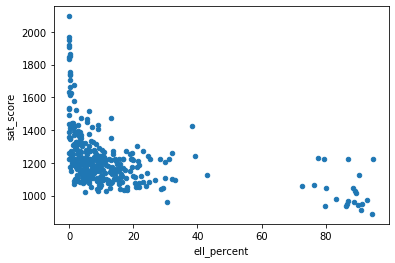

In [55]:
import matplotlib.pyplot as plt
combined.plot.scatter(x="ell_percent", y="sat_score")
plt.savefig('eng_corr.png', dpi=300, bbox_inches='tight')
plt.show()

It does seem from this scatterplot that schools with a higher percentage of non-english speakers tend to score lower on the SAT.

## Plotting survey correlations

In [19]:
list(combined.columns)

['DBN',
 'SCHOOL NAME',
 'Num of SAT Test Takers',
 'SAT Critical Reading Avg. Score',
 'SAT Math Avg. Score',
 'SAT Writing Avg. Score',
 'sat_score',
 'SchoolName',
 'AP Test Takers ',
 'Total Exams Taken',
 'Number of Exams with scores 3 4 or 5',
 'Demographic',
 'School Name',
 'Cohort',
 'Total Cohort',
 'Total Grads - n',
 'Total Grads - % of cohort',
 'Total Regents - n',
 'Total Regents - % of cohort',
 'Total Regents - % of grads',
 'Advanced Regents - n',
 'Advanced Regents - % of cohort',
 'Advanced Regents - % of grads',
 'Regents w/o Advanced - n',
 'Regents w/o Advanced - % of cohort',
 'Regents w/o Advanced - % of grads',
 'Local - n',
 'Local - % of cohort',
 'Local - % of grads',
 'Still Enrolled - n',
 'Still Enrolled - % of cohort',
 'Dropped Out - n',
 'Dropped Out - % of cohort',
 'CSD',
 'NUMBER OF STUDENTS / SEATS FILLED',
 'NUMBER OF SECTIONS',
 'AVERAGE CLASS SIZE',
 'SIZE OF SMALLEST CLASS',
 'SIZE OF LARGEST CLASS',
 'SCHOOLWIDE PUPIL-TEACHER RATIO',
 'Name',

In [56]:
column_list = combined.loc[:,'saf_p_11':'aca_s_11']
column_list['sat_score'] = combined['sat_score']
correlations = column_list.corr()
correlations = correlations['sat_score'].sort_values()

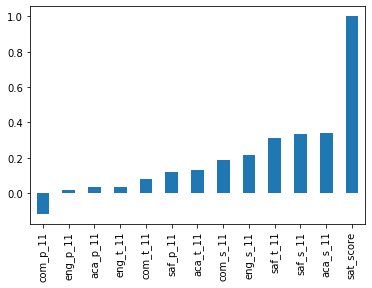

In [57]:
import matplotlib.pyplot as plt
correlations.plot.bar()
plt.savefig('surv_corr.png', dpi=300, bbox_inches='tight')
plt.show()

According to this data, parents ('p' value variables) tend to be poorer at ranking school safety, communication, engagement and academic expectation in a way that reflects the school's SAT scores. Students ('s' value variables), on average, tend to rank these factors in accordance with expected SAT scores.

## Investigating safety scores

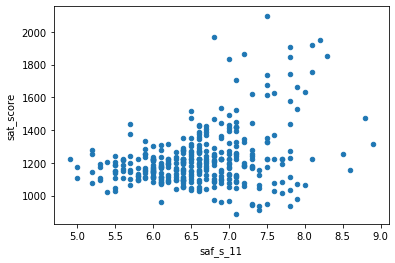

In [58]:
import matplotlib.pyplot as plt
combined.plot.scatter(x="saf_s_11", y="sat_score")
plt.savefig('safety_corr.png', dpi=300, bbox_inches='tight')
plt.show()

According to this plot, it seems as though student "Safety and Respect" scores are positively correlated with the school's mean SAT score. This means that SAT scores tend to be higher in schools where students feel safe and respected, which is to be expected.

## Plotting safety score by district

In [23]:
import numpy

districts = combined.groupby('school_dist').agg(numpy.mean)
districts.reset_index(inplace=True)
print(districts.head())

  school_dist  SAT Critical Reading Avg. Score  SAT Math Avg. Score  \
0          01                       441.833333           473.333333   
1          02                       426.619092           444.186256   
2          03                       428.529851           437.997512   
3          04                       402.142857           416.285714   
4          05                       427.159915           438.236674   

   SAT Writing Avg. Score    sat_score  AP Test Takers   Total Exams Taken  \
0              439.333333  1354.500000       116.681090         173.019231   
1              424.832836  1295.638184       128.908454         201.516827   
2              426.915672  1293.443035       156.183494         244.522436   
3              405.714286  1224.142857       129.016484         183.879121   
4              419.666098  1285.062687        85.722527         115.725275   

   Number of Exams with scores 3 4 or 5  Total Cohort  \
0                            135.800000     93.

In [24]:
conda install basemap-data-hires

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


/Users/eddiekirkland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/Users/eddiekirkland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


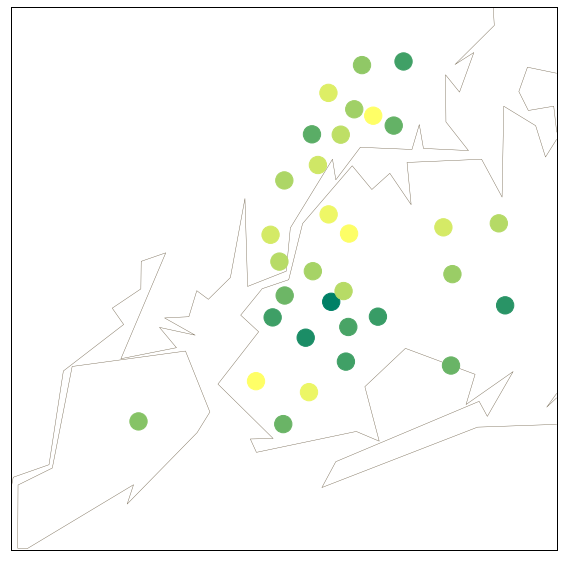

In [59]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(10, 10))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#ffffff')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
longitudes = districts['lon'].tolist()
latitudes = districts['lat'].tolist()
m.scatter(longitudes, latitudes, s=300, zorder=2, latlon=True, c=districts['saf_s_11'], cmap='summer')
plt.savefig('district_safety_map.png', dpi=300, bbox_inches='tight')
plt.show()

In this plot, the darker colors represent lower scores. As such, it seems like the highest scores look to be in the areas of the southern Bronx, Manhattan, southwestern Brooklyn, and norther Queens. The lower scores look to be in central Brooklyn, the upper Bronx, the eastern parts of Queens, and Staten Island.

## Plotting racial correlations

In [26]:
column_list_race = correlations[['white_per', 'asian_per', 'black_per', 'hispanic_per']]

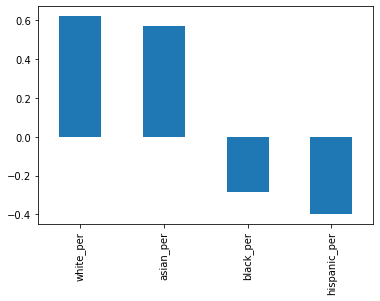

In [60]:
import matplotlib.pyplot as plt
column_list_race.plot.bar()
plt.savefig('racial_corr.png', dpi=300, bbox_inches='tight')
plt.show()

According to this plot, schools with a higher percentage of white or asian students tend to have a higher average SAT score. Schools with a higher percentage of black or hispanic students tend to have a lower average SAT score.

## Exploring hispanic racial correlation

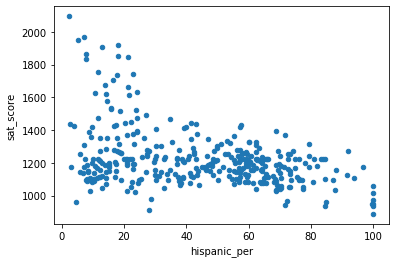

In [61]:
import matplotlib.pyplot as plt
combined.plot.scatter(x="hispanic_per", y="sat_score")
plt.savefig('hispanic_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

This scatter plot shows us that most schools tend to cluster around the mean SAT score, regardless of the percentage of hispanic students. However, those schools with a very high percentage of hispanic students tend to score very low on the SAT score, while those with a very low percentage of hispanic students have more of a chance of achieving a higher average score.

In [29]:
# selecting schools with a hispanic population greater than 95%
high_hispanic_pop = combined[combined['hispanic_per'] > 95]
print(high_hispanic_pop["School Name"])

44             MANHATTAN BRIDGES HIGH SCHOOL
82                                         0
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIE
125                                        0
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object


* The [Manhattan Bridges High School](https://www.usnews.com/education/best-high-schools/new-york/districts/new-york-city-public-schools/manhattan-bridges-high-school-13105) seems to be a 100% minority school with a high focus on AP testing and standardized scores.
* The [Gregorio Luperon High School for SCIE](https://insideschools.org/school/06M552) is a school for Spanish-speaking students focused on science-based topics.
* The [International School for Liberal Arts](https://islaschool.com/) is a school for bilingual students with a high focus on a liberal arts education.
* The [Multicultural High School](https://mhsbk.org/) is focused on helping students who have recently immigrated learn English.
* The [Pan American International High School](https://panamericanihs.org/index.jsp) is similarly focused on Spanish-speaking students.

These schools tended to perform more poorly on the SAT, but are focused largely on non-English speaking students. Thus, their scores on an English-based standardized test are to be expected.

In [30]:
# selecting schools with a hispanic population less than 10% and SAT score over 1800
low_hispanic_pop = combined[combined['hispanic_per'] < 10]
low_hispanic_pop = combined[combined['sat_score'] > 1800]
print(low_hispanic_pop["School Name"])

5             BARD HIGH SCHOOL EARLY COLLEGE
37                    STUYVESANT HIGH SCHOOL
79      HIGH SCHOOL FOR MATHEMATICS  SCIENCE
151             BRONX HIGH SCHOOL OF SCIENCE
155    HIGH SCHOOL OF AMERICAN STUDIES AT LE
187           BROOKLYN TECHNICAL HIGH SCHOOL
302              TOWNSEND HARRIS HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES A
356      STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: School Name, dtype: object


* [Bard High School](https://bhsec.bard.edu/manhattan/) is a college preparatory school associated with Bard College.
* [Stuyvesant High School](https://stuy.enschool.org/) is another academically focused school with a high percentage of Asian-American students.
* [High Scholl for Mathematics and Science](https://hsmse.org/) is another prep school connected with City College of New York.
* [Bronx High School of Science](https://www.bxscience.edu/) is a school specifically focused on scientific learning.
* [High School of American Studies at LE](https://www.hsas-lehman.org/) is focused on American history and is affiliated with Lehman College.

This subset is highly-focused on academics, with several schools partnered with local colleges and universities. Although they seem to be culturally diverse, they obviously have a disproportionately smaller number of hispanic students than other schools in the area.

## Investigating gender differences

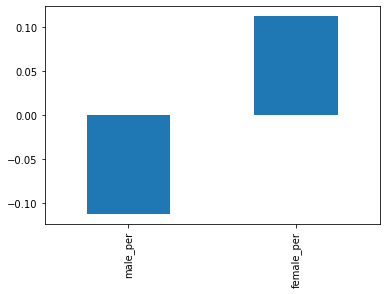

In [64]:
column_list_gender = correlations[['male_per', 'female_per']]
column_list_gender.plot.bar()
plt.savefig('gender_corr.png', dpi=300, bbox_inches='tight')
plt.show()

Although the percentage of correlation in these categories is small (less than .15), it seems that schools with higher percentages of females tend to score higher on the SAT, while scores with higher percentages of males tend to score lower on the SAT.

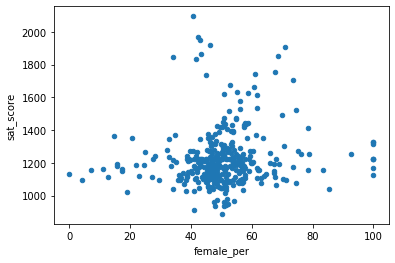

In [65]:
import matplotlib.pyplot as plt
combined.plot.scatter(x="female_per", y="sat_score")
plt.savefig('female_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

This scatter plot shows that the average SAT score of a school tends to increase along with the percentage of females. However, schools that are made up exclusively of females do not necessarily score highest on the SAT. This leads to believe that the correlation may be due to other factors. For instance, schools with a higher percentage of females may tend to have a higher focus on academics overall.

In [33]:
# selecting schools with a female population greater than 60% and SAT score greater than 1700
hi_female_pop = combined[combined['female_per'] > 60]
hi_female_pop = combined[combined['sat_score'] > 1700]
print(hi_female_pop["School Name"])

5             BARD HIGH SCHOOL EARLY COLLEGE
26             ELEANOR ROOSEVELT HIGH SCHOOL
37                    STUYVESANT HIGH SCHOOL
60                        BEACON HIGH SCHOOL
61      FIORELLO H. LAGUARDIA HIGH SCHOOL OF
79      HIGH SCHOOL FOR MATHEMATICS  SCIENCE
151             BRONX HIGH SCHOOL OF SCIENCE
155    HIGH SCHOOL OF AMERICAN STUDIES AT LE
187           BROOKLYN TECHNICAL HIGH SCHOOL
198               BROOKLYN LATIN SCHOOL  THE
302              TOWNSEND HARRIS HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES A
356      STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: School Name, dtype: object


* [Bard High School](https://bhsec.bard.edu/manhattan/) is a college preparatory school associated with Bard College.
* [Stuyvesant High School](https://stuy.enschool.org/) is another academically focused school with a high percentage of Asian-american students.
* [Eleanor Roosevelt High School](https://www.erhsnyc.org/apps/pages/?userGroupREC_ID=27970&uREC_ID=27970&type=d&title=Admissions+Information&un=SEC-ADM) is a screened school focused on academics.
* [Beacon High School](http://beaconschool.org/about-us/) is focused on technology and the arts.
* [Fiorello H. Laguardia High School](https://www.laguardiahs.org/) is a performing arts focused school and admission is screened through an audition process.

Again, these schools tend to be preparatory schools, or those focused on science and the arts.

## Investigating AP testing correlations

In [66]:
# Creating an ap_per value, the average number of tests taken per student
combined['ap_per'] = (combined['AP Test Takers '] / combined['total_enrollment'])

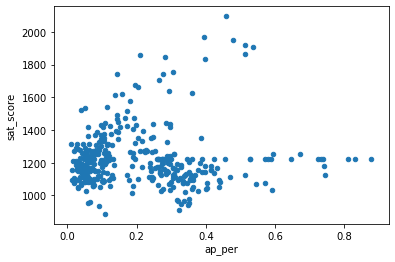

In [67]:
import matplotlib.pyplot as plt
combined.plot.scatter(x="ap_per", y="sat_score")
plt.savefig('ap_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In this plot, it seems as though the percentage of students in each high school that take AP examinations has an interesting correlation with the mean SAT score. Between 0% and 0.6%, the correlation seems to be positive. However, schools with higher than 0.6% of the student body taking AP examinations tend to not improve the mean SAT at all. Instead, it hovers just above 1200.